In [1]:
%load_ext autoreload
%autoreload 2

from astropy import units as u
from astropy import coordinates as coord
import ligo.skymap.plot
from plotsettings import *
from routines import *
from standard_libraries import *

# Object properties

In [2]:
target = ascii.read('targets.ascii')
target

NAME,RA,DEC
str9,str12,str12
AT2017gfo,13:09:48.082,-23:22:53.28


In [3]:
if ':' in target['RA'][0]:
    coordinates = coord.SkyCoord(target['RA'][0], target['DEC'][0], unit=(u.hour, u.deg))
else:
    coordinates = coord.SkyCoord(target['RA'][0], target['DEC'][0], unit=u.deg)

coordinates

<SkyCoord (ICRS): (ra, dec) in deg
    (197.45034167, -23.38146667)>

# Search radius

In [4]:
radius = 60*u.arcmin

# Queries

ASKAP query can fail if you use large search areas

In [5]:
result_askap = query_askap(coordinates, radius)

Created TAP+ (v20200428.1) - Connection:
	Host: casda.csiro.au
	Use HTTPS: True
	Port: 443
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]


In [6]:
result_first = query_first(coordinates, radius)

In [7]:
result_nvss = query_nvss(coordinates, radius)

In [8]:
result_vlass = query_vlass(coordinates, radius)

In [9]:
# Plot results

''

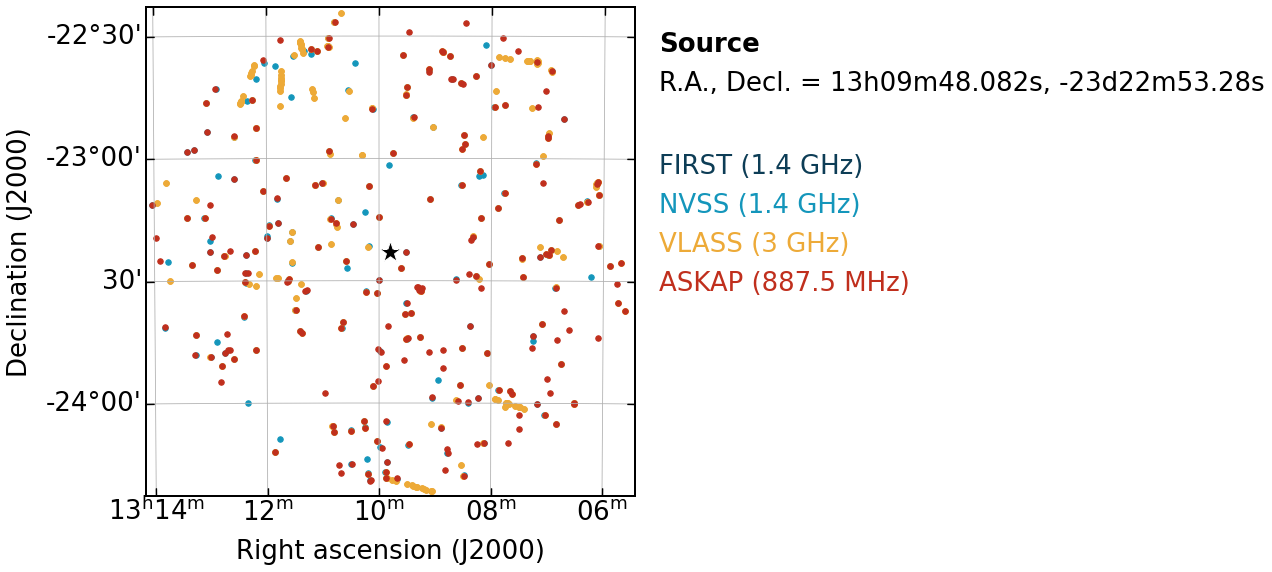

In [10]:
color_source = 'black'
color_first  = vigit_color_1
color_nvss   = vigit_color_4
color_vlass  = vigit_color_8
color_askap  = vigit_color_12

plt.figure(figsize=(9, 9))

ax = plt.axes(projection='astro zoom',
              center=coordinates, radius=radius)#, rotate='20 deg')

ax.scatter(coordinates.ra.deg, coordinates.dec.deg, transform=ax.get_transform('fk5'),
                    s=500, marker='*', facecolor=color_source, edgecolor='white', zorder=0)

if result_first is not None:
    for ii in range(len(result_first)):
        _coordinates = coord.SkyCoord(result_first['RAJ2000'][ii].replace(' ', ':'), result_first['DEJ2000'][ii].replace(' ', ':'), unit=(u.hour, u.deg))
        ax.scatter(_coordinates.ra.deg, _coordinates.dec.deg, transform=ax.get_transform('fk5'),
                    s=30, marker='o', facecolor=color_first)

if result_nvss is not None:
    for ii in range(len(result_nvss)):
        _coordinates = coord.SkyCoord(result_nvss['RAJ2000'][ii].replace(' ', ':'), result_nvss['DEJ2000'][ii].replace(' ', ':'), unit=(u.hour, u.deg))
        ax.scatter(_coordinates.ra.deg, _coordinates.dec.deg, transform=ax.get_transform('fk5'),
                    s=30, marker='o', facecolor=color_nvss)

if result_vlass is not None:
    for ii in range(len(result_vlass)):
        ax.scatter(result_vlass['RAJ2000'][ii], result_vlass['DEJ2000'][ii], transform=ax.get_transform('fk5'),
                    s=30, marker='o', facecolor=color_vlass)

if result_vlass is not None:
    for ii in range(len(result_vlass)):
        ax.scatter(result_vlass['RAJ2000'][ii], result_vlass['DEJ2000'][ii], transform=ax.get_transform('fk5'),
                    s=30, marker='o', facecolor=color_vlass)

if result_askap is not None:
    for ii in range(len(result_askap)):
        ax.scatter(result_askap['ra'][ii], result_askap['dec'][ii], transform=ax.get_transform('fk5'),
                    s=30, marker='o', facecolor=color_askap)


# Prettify
        
ax.grid()

ax.set_xlabel('Right ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

text_kwargs = {'ha': 'left', 'va': 'top', 'fontsize':label_size, 'transform':ax.transAxes}

_coordinates = coordinates.to_string('hmsdms')
label = 'R.A., Decl. = {ra}, {dec}'.format(ra=_coordinates.split(' ')[0], dec=_coordinates.split(' ')[1])

plt.text(right + 0.05, top-0.05, 'Source',            color='black', fontweight='bold', **text_kwargs)
plt.text(right + 0.05, top-0.13, label,               color='black', **text_kwargs)
plt.text(right + 0.05, top-0.30, 'FIRST (1.4 GHz)',   color=color_first, **text_kwargs)
plt.text(right + 0.05, top-0.38, 'NVSS (1.4 GHz)',    color=color_nvss , **text_kwargs)
plt.text(right + 0.05, top-0.46, 'VLASS (3 GHz)',     color=color_vlass, **text_kwargs)
plt.text(right + 0.05, top-0.54, 'ASKAP (887.5 MHz)', color=color_askap, **text_kwargs)
;

In [11]:
# Show query outputs

If the search radius is in arcmin, the distance '_r' is in units of arcmin

In [12]:
result_first

In [13]:
result_nvss

_r,recno,Field,Xpos,Ypos,NVSS,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,S1.4,e_S1.4,l_MajAxis,MajAxis,l_MinAxis,MinAxis,PA,e_MajAxis,e_MinAxis,e_PA,f_resFlux,resFlux,polFlux,polPA,e_polFlux,e_polPA,Image
,,,pix,pix,,'h:m:s','d:m:s',s,arcsec,mJy,mJy,,arcsec,,arcsec,deg,arcsec,arcsec,deg,,mJy,mJy,deg,mJy,deg,
float64,int32,str8,float32,float32,str14,str11,str11,float32,float32,float64,float32,str1,float32,str1,float32,float32,float32,float32,float32,str2,int16,float32,float32,float32,float32,str5
3.8417,972182,C1304M24,207.89,659.49,130931-232300,13 09 31.35,-23 23 00.1,0.37,5.6,3.2,0.5,<,52.2,<,47.6,--,--,--,--,,--,-0.13,--,0.42,--,Image
4.7477,972286,C1304M24,202.91,643.89,130936-232653,13 09 36.95,-23 26 53.4,0.32,4.4,3.8,0.5,<,48.3,<,43.2,--,--,--,--,,--,0.11,47.7,0.42,77.9,Image
5.4129,972961,C1304M24,171.55,665.13,131010-232129,13 10 10.88,-23 21 29.9,0.55,8.5,2.2,0.5,<,68.6,<,60.9,--,--,--,--,,--,0.29,-48.4,0.42,29.7,Image
7.3584,972768,C1304M24,181.88,632.35,131000-232943,13 10 00.00,-23 29 43.2,0.30,4.8,5.3,0.6,<,69.3,<,39.0,--,--,--,--,,--,0.88,47.8,0.75,13.0,Image
8.9545,972751,C1304M24,181.65,693.91,130959-231419,13 09 59.56,-23 14 19.8,0.08,1.3,13.3,0.6,<,24.9,<,21.2,--,--,--,--,,--,-0.24,--,0.45,--,Image
10.6540,972801,C1304M24,180.22,618.99,131001-233303,13 10 01.97,-23 33 03.3,0.06,0.9,18.9,0.7,<,18.9,<,18.4,--,--,--,--,,--,1.58,-29.0,0.42,5.5,Image
11.0204,973474,C1304M24,149.55,650.04,131035-232512,13 10 35.04,-23 25 12.5,0.10,1.5,11.6,0.6,<,27.5,<,22.6,--,--,--,--,,--,0.34,-6.3,0.45,26.3,Image
11.2640,973444,C1304M24,150.49,643.62,131034-232649,13 10 34.10,-23 26 49.0,0.44,16.1,3.5,0.7,<,148.0,<,57.1,--,--,--,--,S*,22,-0.48,--,1.52,--,Image


In [14]:
result_vlass

_r,recno,CompName,CompId,IslId,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,Ftot,e_Ftot,Fpeak,e_Fpeak,Maj,e_Maj,Min,e_Min,PA,e_PA,FtotIsl,e_FtotIsl,Islrms,Islmean,ResIdIslrms,ResidIslmean,RAMdeg,DEMdeg,e_RAMdeg,e_DEMdeg,SCode,Xposn,e_Xposn,Yposn,e_Yposn,XposnMax,e_XposnMax,YposnMax,e_YposnMax,MajImgPlane,e_MajImgPlane,MinImgPlane,e_MinImgPlane,PAImgPlane,e_PAImgPlane,DCMaj,e_DCMaj,DCMin,e_DCMin,DCPA,e_DCPA,DCMajImgPlane,e_DCMajImgPlane,DCMinImgPlane,e_DCMinImgPlane,DCPAImgPlane,e_DCPAImgPlane,Tile,Subtile,RASdeg,DESdeg,NVSSdist,FIRSTdist,PeakToRing,DupFlag,QualFlag,NNdist,BMaj,BMin,BPA,MainSample,QLcutout
,,,,,deg,deg,deg,deg,mJy,mJy,mJy / beam,mJy / beam,arcsec,arcsec,arcsec,arcsec,deg,deg,mJy,mJy,mJy / beam,mJy / beam,mJy / beam,mJy / beam,deg,deg,deg,deg,,pix,pix,pix,pix,pix,pix,pix,pix,arcsec,arcsec,arcsec,arcsec,deg,deg,arcsec,arcsec,arcsec,arcsec,deg,deg,arcsec,arcsec,arcsec,arcsec,deg,deg,,,deg,deg,arcsec,arcsec,,,,arcsec,arcsec,arcsec,deg,,
float64,int32,str31,int16,int16,float64,float64,float64,float64,float64,float32,float64,float32,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float64,float64,float64,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,str14,float64,float64,float64,float64,float64,uint8,uint8,float64,float32,float32,int16,uint8,str237
4.7637,1854292,VLASS1QLCIR J130936.77-232652.9,7,8,197.40320999,-23.44804208,0.00002490,0.00006064,2.651,0.428,1.500,0.162,3.9112,0.5201,2.2220,0.1956,9.3272,10.3982,2.095,0.299,0.158,0.000,0.070,0.002,197.40320999,-23.44804208,0.00002490,0.00006064,S,730.91249,0.08964,2045.70531,0.21830,730.91249,0.08964,2045.7053,0.2183,3.9112,0.5201,2.2220,0.1956,9.4633,10.3982,3.1944,0.5201,0.3790,0.1956,6.5447,10.3982,3.1944,0.5201,0.3790,0.1956,6.6807,10.3982,T05t20,J130814-233000,197.06134,-23.50000,2.51402,55302.93210,3.9173,0,0,442.24000,2.34,2.10,45,1,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/caom2ops/sync?ID=ad%3AVLASS%2FVLASS1.2.ql.T05t20.J130814-233000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits&RUNID%3Dyixhksgr2pmmb0ys&CIRCLE=197.40320998946186+-23.44804207825705+0.025
5.5037,1855653,VLASS1QLCIR J131011.46-232139.8,2,2,197.54777221,-23.36105916,0.00001874,0.00002562,2.373,0.307,2.103,0.162,2.6365,0.2260,2.1040,0.1459,21.1281,15.2780,2.394,0.344,0.159,0.000,0.085,0.003,197.54777221,-23.36105916,0.00001874,0.00002562,S,252.42103,0.06745,2357.46546,0.09222,252.42103,0.06745,2357.4655,0.0922,2.6365,0.2260,2.1039,0.1459,21.3209,15.2780,0.0000,0.2260,0.0000,0.1459,0.0000,15.2780,0.0000,0.2260,0.0000,0.1459,0.0000,15.2780,T05t20,J130814-233000,197.06134,-23.50000,12.66872,55008.34977,3.8494,0,0,387.08000,2.34,2.10,45,1,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/caom2ops/sync?ID=ad%3AVLASS%2FVLASS1.2.ql.T05t20.J130814-233000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits&RUNID%3Dyixhksgr2pmmb0ys&CIRCLE=197.54777221345313+-23.36105915521116+0.025
8.9486,1855219,VLASS1QLCIR J130959.58-231420.2,5,6,197.49825762,-23.23896035,0.00000601,0.00000601,8.221,0.301,7.539,0.163,2.4698,0.0569,2.1706,0.0442,44.8447,7.0790,10.445,0.462,0.161,0.000,0.348,0.351,197.49825762,-23.23896035,0.00000601,0.00000601,S,414.73006,0.02165,2797.54215,0.02165,414.73006,0.02165,2797.5422,0.0216,2.4698,0.0569,2.1706,0.0442,45.0171,7.0790,0.7992,0.0569,0.5343,0.0442,45.8604,7.0790,0.7992,0.0569,0.5343,0.0442,46.0328,7.0790,T05t20,J130814-233000,197.06134,-23.50000,0.46264,54562.34362,12.1295,0,0,469.05000,2.34,2.10,45,1,https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/caom2ops/sync?ID=ad%3AVLASS%2FVLASS1.2.ql.T05t20.J130814-233000.10.2048.v1.I.iter1.image.pbcor.tt0.subim.fits&RUNID%3Dyixhksgr2pmmb0ys&CIRCLE=197.49825762161944+-23.23896035239488+0.025
10.6396,1855297,VLASS1QLCIR J131001.74-233303.3,4,5,197.50728160,-23.55093060,0.00001691,0.00001259,5.914,0.400,3.787,0.169,3.0115,0.1434,2.5498,0.1066,92.

In [15]:
result_askap

_r,id,catalogue_id,gaussian_id,source_id,tile_id,sbid,obs_start_time,n_gaus,ra,dec,e_ra,e_dec,total_flux_gaussian,e_total_flux_gaussian_pybdsf,e_total_flux_gaussian,total_flux_source,e_total_flux_source_pybdsf,e_total_flux_source,peak_flux,e_peak_flux,maj_axis,e_maj_axis,min_axis,e_min_axis,pa,e_pa,dc_maj,e_dc_maj,dc_min,e_dc_min,dc_pa,e_dc_pa,s_code,separation_tile_centre,noise,gal_lon,gal_lat
,,,,,,,,,deg,deg,arcsec,arcsec,mJy,mJy,mJy,mJy,mJy,mJy,mJy / beam,mJy / beam,arcsec,arcsec,arcsec,arcsec,deg,deg,arcsec,arcsec,arcsec,arcsec,deg,deg,,deg,mJy / beam,deg,deg
float64,int64,int64,str19,str19,str13,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,float64,float64
3.8956,1366461,4549,RACS_1307-25A_4118,RACS_1307-25A_3653,RACS_1307-25A,8584,58600.53301,1,197.37964,-23.38347,1.46,1.85,6.375,1.46,1.74,6.375,1.46,1.74,5.257,0.738,29.34,4.36,25.84,3.43,4.09,47.91,15.34,4.36,6.55,3.43,4.09,47.91,S,1.7837,0.711,308.295643,39.299902
4.7797,1366449,4549,RACS_1307-25A_4101,RACS_1307-25A_3639,RACS_1307-25A,8584,58600.53301,1,197.402084,-23.447686,1.51,1.68,5.414,1.192,1.481,5.414,1.192,1.481,4.849,0.63,31.03,4.69,22.5,2.51,140.55,18.91,18.37,4.69,0.0,2.51,140.55,18.91,S,1.7253,0.626,308.314603,39.234081
7.4194,1366404,4549,RACS_1307-25A_4024,RACS_1307-25A_3567,RACS_1307-25A,8584,58600.53301,1,197.5002,-23.496351,1.02,1.55,9.563,1.338,1.777,9.563,1.338,1.777,6.521,0.584,37.27,3.95,24.6,1.86,153.96,10.66,27.63,3.95,0.0,1.86,153.96,10.66,S,1.7005,0.562,308.42448,39.177347
8.9437,1366405,4549,RACS_1307-25A_4025,RACS_1307-25A_3568,RACS_1307-25A,8584,58600.53301,1,197.498119,-23.23901,1.05,0.93,10.502,1.669,2.076,10.502,1.669,2.076,10.478,0.959,26.68,2.6,23.49,2.02,120.6,30.74,0.0,2.6,0.0,2.02,0.0,30.74,S,1.9487,0.962,308.452964,39.43375
10.6544,1366393,4549,RACS_1307-25A_4007,RACS_1307-25A_3551,RACS_1307-25A,8584,58600.53301,1,197.507789,-23.551041,0.21,0.2,33.276,0.995,2.999,33.276,0.995,2.999,29.178,0.525,27.83,0.52,25.62,0.44,119.27,8.99,12.22,0.52,5.58,0.44,119.27,8.99,S,1.6501,0.511,308.42686,39.122247
10.9094,1366493,4549,RACS_1307-25A_4161,RACS_1307-25A_3689,RACS_1307-25A,8584,58600.53301,5,197.332651,-23.527764,1.2,2.84,15.633,1.943,2.514,145.476,3.749,11.322,6.309,0.567,60.62,7.04,25.56,1.77,18.7,6.7,55.22,7.04,5.3,1.77,18.7,6.7,M,1.6337,0.587,308.223441,39.160077
11.0050,1366338,4549,RACS_1307-25A_3917,RACS_1307-25A_3469,RACS_1307-25A,8584,58600.53301,1,197.645614,-23.420523,0.47,0.53,17.517,1.23,2.12,17.517,1.23,2.12,14.689,0.629,28.86,1.3,25.84,1.05,150.8,16.4,14.41,1.3,6.52,1.05,150.8,16.4,S,1.8134,0.607,308.605105,39.240246
11.0889,1366492,4549,RACS_1307-25A_4157,RACS_1307-25A_3689,RACS_1307-25A,8584,58600.53301,5,197.325924,-23.526826,0.38,0.52,35.075,1.626,3.373,145.476,3.749,11.322,20.017,0.632,36.76,1.25,29.81,0.87,164.0,6.8,26.94,1.25,16.23,0.87,164.0,6.8,M,1.6335,0.587,308.215626,39.161563
